In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [15]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [16]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
features = ds[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds[['age','accuracy']]=features_std

In [18]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
features = ds.drop(columns="country",axis=1)

In [13]:
#lets try with k=3 first
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

In [14]:
# Train model
model = cluster.fit(features_std)

In [15]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 2.95533967e+00  2.87650266e+00  2.99797316e+00  1.98986581e+00
   2.30493430e+00  3.33372938e+00  3.08072407e+00  2.17228124e+00
   3.00705899e+00  1.75062902e+00  1.69443668e+00  1.60770198e+00
   2.02425217e+00  2.97861336e+00  3.06402013e+00  2.58324015e+00
   2.11559966e+00  1.76754263e+00  1.86636847e+00  2.77704781e+00
   2.42402852e+00  1.54514957e+00  3.50865642e-01  1.50950517e+00
   4.84338443e-02  4.94368186e-01  1.10427733e-02  1.37685211e-02
   1.22309198e-02  1.42577579e-02  1.13922281e-02  1.45373218e-02
   7.12887895e-03  1.11825552e-02  1.12524462e-02  1.14621191e-02
   7.75789768e-03  1.18115739e-02  1.07632094e-02  1.23707017e-02
   1.00642997e-02  1.06234275e-02  1.34889572e-02  1.21610288e-02
   5.52138664e-03  9.85462678e-03  9.57506290e-03  1.15320101e-02]
 [ 4.22191393e+00  2.81462896e+00  3.47576598e+00  3.65299014e+00
   4.15892319e+00  4.50522463e+00  3.49625125e+00  4.15313773e+00
   4.08831690e+00  3.56597202e+00  4.05755948e+00  3.85388748e+00
   4.1743

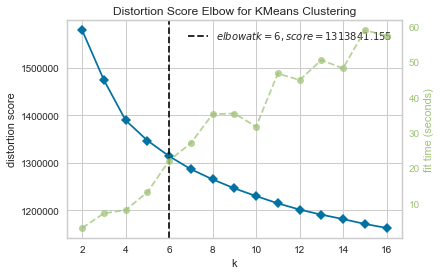

In [16]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,17))
visualizer.fit(features)
visualizer.poof()

In [8]:
#ds.drop(columns="country",axis=1)

In [19]:
# Create k-mean object
n_clusters = 6
ds_cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1).fit(ds.drop(columns="country",axis=1))

In [20]:
# Your code here:
ds["labels"]=ds_cluster.labels_

In [23]:
# Your code here:
ds.groupby("labels").count()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672
1,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359
2,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618
3,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005
4,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814
5,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161


Do cluster visualization

In [22]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,labels
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.033490,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,0.754712,3,0.713834,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,-0.360400,2,-0.218785,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,-0.174548,1,0.962532,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,-0.453326,2,0.402961,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
